In [239]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [240]:
flagdata = pd.read_csv("project data/FLAG_PHILADELPHIA_2006.csv")
flagdata.head()

,CRN,AGGRESSIVE_DRIVING,ALCOHOL_RELATED,ANGLE_CRASH,ATV,BACKUP_CONGESTION,BACKUP_NONRECURRING,BACKUP_PRIOR,BICYCLE,CELL_PHONE,...,UNLICENSED,UNSIGNALIZED_INT,URBAN,VEHICLE_FAILURE,VEHICLE_TOWED,VULNERABLE_ROAD_USER,VULNERABLE_ROAD_USER_FATAL,WET_ROAD,WORK_ZONE,YOUNG_DRIVER
0,2006033283,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2006123825,0,0,1,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0
2,2006113461,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2006080851,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2006103260,1,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [241]:
flagdata.shape

(11753, 120)

In [242]:
#Making copy of original 2006 flag dataset to begin cleaning process
cleaned_2006_data = flagdata.copy()
cleaned_2006_data.head()

,CRN,AGGRESSIVE_DRIVING,ALCOHOL_RELATED,ANGLE_CRASH,ATV,BACKUP_CONGESTION,BACKUP_NONRECURRING,BACKUP_PRIOR,BICYCLE,CELL_PHONE,...,UNLICENSED,UNSIGNALIZED_INT,URBAN,VEHICLE_FAILURE,VEHICLE_TOWED,VULNERABLE_ROAD_USER,VULNERABLE_ROAD_USER_FATAL,WET_ROAD,WORK_ZONE,YOUNG_DRIVER
0,2006033283,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2006123825,0,0,1,0,0,0,0,0,0,...,0,1,1,0,1,0,0,0,0,0
2,2006113461,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2006080851,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2006103260,1,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [243]:
#Looked through dataset for valuable columns to keep.
columns_to_keep = ['CRN','CURVED_ROAD', 'DISTRACTED', 'DRUG_RELATED','DRUGGED_DRIVER', 'IMPAIRED_DRIVER', 'INTERSECTION',
                  'INTERSTATE', 'SPEEDING', 'SPEEDING_RELATED', 'WET_ROAD']

#Keeping specifed wanted columns
cleaned_2006_data = cleaned_2006_data.drop(columns=cleaned_2006_data.columns.difference(columns_to_keep))
cleaned_2006_data.head()

,CRN,CURVED_ROAD,DISTRACTED,DRUG_RELATED,DRUGGED_DRIVER,IMPAIRED_DRIVER,INTERSECTION,INTERSTATE,SPEEDING,SPEEDING_RELATED,WET_ROAD
0,2006033283,0,0,0,0,0,0,0,0,0,0
1,2006123825,0,0,0,0,0,1,0,0,0,0
2,2006113461,0,0,0,0,0,1,0,0,0,0
3,2006080851,0,0,0,0,0,0,0,0,0,0
4,2006103260,0,0,0,0,1,0,0,1,1,0


In [244]:
cleaned_2006_data.shape

(11753, 11)

In [245]:
# Define the columns to check for 0 values
columns_to_check = ['CRN','CURVED_ROAD', 'DISTRACTED', 'DRUG_RELATED', 'DRUGGED_DRIVER', 'IMPAIRED_DRIVER', 'INTERSECTION', 'INTERSTATE', 'SPEEDING', 'SPEEDING_RELATED', 'WET_ROAD']

#Find rows containing a 0 in every column using boolean mask
mask = cleaned_2006_data[columns_to_check].eq(0).all(axis=1)

#Using the filter
cleaned_2006_data = cleaned_2006_data[~mask]
#Dataset changed in number of rows bc those with 0's in every column were removed
cleaned_2006_data.shape

(11753, 11)

In [246]:
cleaned_2006_data.head()

,CRN,CURVED_ROAD,DISTRACTED,DRUG_RELATED,DRUGGED_DRIVER,IMPAIRED_DRIVER,INTERSECTION,INTERSTATE,SPEEDING,SPEEDING_RELATED,WET_ROAD
0,2006033283,0,0,0,0,0,0,0,0,0,0
1,2006123825,0,0,0,0,0,1,0,0,0,0
2,2006113461,0,0,0,0,0,1,0,0,0,0
3,2006080851,0,0,0,0,0,0,0,0,0,0
4,2006103260,0,0,0,0,1,0,0,1,1,0


In [247]:
import pandas as pd

#Loading 2007 Flag 
flagdata_2007 = pd.read_csv("project data/FLAG_PHILADELPHIA_2007.csv")
flagdata_2007.head()

,CRN,AGGRESSIVE_DRIVING,ALCOHOL_RELATED,ANGLE_CRASH,ATV,BACKUP_CONGESTION,BACKUP_NONRECURRING,BACKUP_PRIOR,BICYCLE,CELL_PHONE,...,UNLICENSED,UNSIGNALIZED_INT,URBAN,VEHICLE_FAILURE,VEHICLE_TOWED,VULNERABLE_ROAD_USER,VULNERABLE_ROAD_USER_FATAL,WET_ROAD,WORK_ZONE,YOUNG_DRIVER
0,2007105905,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,2007098585,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,0,0
2,2007080107,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,2007109774,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
4,2007105922,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [248]:
flagdata_2007.shape

(11625, 120)

In [249]:
#Making a copy of the original 2007 flag dataset to begin the cleaning process
cleaned_2007_data = flagdata_2007.copy()

#Look through the dataset for valuable columns to keep
columns_to_keep = ['CRN','CURVED_ROAD', 'DISTRACTED', 'DRUG_RELATED', 'DRUGGED_DRIVER', 'IMPAIRED_DRIVER', 'INTERSECTION', 'INTERSTATE', 'SPEEDING', 'SPEEDING_RELATED', 'WET_ROAD']

#Keeping the specified wanted columns
cleaned_2007_data = cleaned_2007_data[columns_to_keep]

#Find rows containing a 0 in every column using a boolean mask
mask = cleaned_2007_data.eq(0).all(axis=1)

#Using the filter
cleaned_2007_data = cleaned_2007_data[~mask]

#Print the shape of the cleaned dataset to verify the changes in the number of rows
print("Shape of cleaned 2007 data:", cleaned_2007_data.shape)

#Display the first few rows of the cleaned dataset
cleaned_2007_data.head()


Shape of cleaned 2007 data: (11625, 11)


,CRN,CURVED_ROAD,DISTRACTED,DRUG_RELATED,DRUGGED_DRIVER,IMPAIRED_DRIVER,INTERSECTION,INTERSTATE,SPEEDING,SPEEDING_RELATED,WET_ROAD
0,2007105905,0,0,0,0,0,1,0,0,0,0
1,2007098585,0,0,0,0,0,1,0,0,1,1
2,2007080107,0,0,0,0,0,1,0,0,0,0
3,2007109774,0,0,0,0,0,1,0,0,0,0
4,2007105922,0,0,0,0,0,1,0,0,0,0


In [250]:
import pandas as pd

#Loading 2009 Flag 
flagdata_2009 = pd.read_csv("project data/FLAG_PHILADELPHIA_2009.csv")
flagdata_2009.head()

,CRN,AGGRESSIVE_DRIVING,ALCOHOL_RELATED,ANGLE_CRASH,ATV,BACKUP_CONGESTION,BACKUP_NONRECURRING,BACKUP_PRIOR,BICYCLE,CELL_PHONE,...,UNLICENSED,UNSIGNALIZED_INT,URBAN,VEHICLE_FAILURE,VEHICLE_TOWED,VULNERABLE_ROAD_USER,VULNERABLE_ROAD_USER_FATAL,WET_ROAD,WORK_ZONE,YOUNG_DRIVER
0,2009124269,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,2009049587,1,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2,2009049077,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3,2009120805,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,2009065787,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,0,0


In [251]:
flagdata_2009.shape

(10742, 120)

In [252]:
#Making a copy of the original 2009 flag dataset to begin the cleaning process
cleaned_2009_data = flagdata_2009.copy()

#Look through the dataset for valuable columns to keep
columns_to_keep = ['CRN','CURVED_ROAD', 'DISTRACTED', 'DRUG_RELATED', 'DRUGGED_DRIVER', 'IMPAIRED_DRIVER', 'INTERSECTION', 'INTERSTATE', 'SPEEDING', 'SPEEDING_RELATED', 'WET_ROAD']

#Keeping the specified wanted columns
cleaned_2009_data = cleaned_2009_data[columns_to_keep]

#Find rows containing a 0 in every column using a boolean mask
mask = cleaned_2009_data.eq(0).all(axis=1)

#Using the filter
cleaned_2009_data = cleaned_2009_data[~mask]

#Print the shape of the cleaned dataset to verify the changes in the number of rows
print("Shape of cleaned 2009 data:", cleaned_2009_data.shape)

#Display the first few rows of the cleaned dataset
cleaned_2009_data.head()


Shape of cleaned 2009 data: (10742, 11)


,CRN,CURVED_ROAD,DISTRACTED,DRUG_RELATED,DRUGGED_DRIVER,IMPAIRED_DRIVER,INTERSECTION,INTERSTATE,SPEEDING,SPEEDING_RELATED,WET_ROAD
0,2009124269,0,0,0,0,0,1,0,0,0,0
1,2009049587,0,0,0,0,0,1,0,0,0,1
2,2009049077,0,0,0,0,0,0,0,0,0,1
3,2009120805,0,0,0,0,0,1,0,0,0,0
4,2009065787,0,0,0,0,0,1,0,0,0,0


In [253]:
import pandas as pd

#Loading 2010 Flag 
flagdata_2010 = pd.read_csv("project data/FLAG_PHILADELPHIA_2010.csv")
flagdata_2010.head()

,CRN,AGGRESSIVE_DRIVING,ALCOHOL_RELATED,ANGLE_CRASH,ATV,BACKUP_CONGESTION,BACKUP_NONRECURRING,BACKUP_PRIOR,BICYCLE,CELL_PHONE,...,UNLICENSED,UNSIGNALIZED_INT,URBAN,VEHICLE_FAILURE,VEHICLE_TOWED,VULNERABLE_ROAD_USER,VULNERABLE_ROAD_USER_FATAL,WET_ROAD,WORK_ZONE,YOUNG_DRIVER
0,2010122641,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
1,2010070779,1,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,2010028119,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3,2010122432,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,2010052214,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [254]:
flagdata_2010.shape

(11070, 120)

In [255]:
#Making a copy of the original 2010 flag dataset to begin the cleaning process
cleaned_2010_data = flagdata_2010.copy()

#Look through the dataset for valuable columns to keep
columns_to_keep = ['CRN','CURVED_ROAD', 'DISTRACTED', 'DRUG_RELATED', 'DRUGGED_DRIVER', 'IMPAIRED_DRIVER', 'INTERSECTION', 'INTERSTATE', 'SPEEDING', 'SPEEDING_RELATED', 'WET_ROAD']

#Keeping the specified wanted columns
cleaned_2010_data = cleaned_2010_data[columns_to_keep]

#Find rows containing a 0 in every column using a boolean mask
mask = cleaned_2010_data.eq(0).all(axis=1)

#Using the filter
cleaned_2010_data = cleaned_2010_data[~mask]

#Print the shape of the cleaned dataset to verify the changes in the number of rows
print("Shape of cleaned 2010 data:", cleaned_2009_data.shape)

#Display the first few rows of the cleaned dataset
cleaned_2010_data.head()

Shape of cleaned 2010 data: (10742, 11)


,CRN,CURVED_ROAD,DISTRACTED,DRUG_RELATED,DRUGGED_DRIVER,IMPAIRED_DRIVER,INTERSECTION,INTERSTATE,SPEEDING,SPEEDING_RELATED,WET_ROAD
0,2010122641,0,0,0,0,0,1,0,0,0,0
1,2010070779,0,0,0,0,0,1,0,0,0,0
2,2010028119,0,0,0,0,0,1,0,0,0,1
3,2010122432,0,0,0,0,0,1,0,0,0,0
4,2010052214,0,0,0,0,0,1,0,0,0,0


In [256]:
# Check the sum of accidents for each feature for all years
data_2006 = cleaned_2006_data
accidents_2006 = data_2006[columns_to_keep].sum()
print("\nSum of accidents for 2006:")
print(accidents_2006)
data_2007 = cleaned_2007_data
accidents_2007 = data_2007[columns_to_keep].sum()
print("\nSum of accidents for 2007:")
print(accidents_2007)
data_2009 = cleaned_2009_data
accidents_2009 = data_2009[columns_to_keep].sum()
print("\nSum of accidents for 2009:")
print(accidents_2009)
data_2010 = cleaned_2010_data
accidents_2010 = data_2010[columns_to_keep].sum()
print("\nSum of accidents for 2010:")
print(accidents_2010)


Sum of accidents for 2006:
CRN                 23579096600735
CURVED_ROAD                    870
DISTRACTED                     829
DRUG_RELATED                   295
DRUGGED_DRIVER                 284
IMPAIRED_DRIVER                828
INTERSECTION                  7258
INTERSTATE                     638
SPEEDING                       568
SPEEDING_RELATED              1492
WET_ROAD                      2249
dtype: int64

Sum of accidents for 2007:
CRN                 23334261244708
CURVED_ROAD                    908
DISTRACTED                     762
DRUG_RELATED                   297
DRUGGED_DRIVER                 271
IMPAIRED_DRIVER                773
INTERSECTION                  6815
INTERSTATE                     926
SPEEDING                       523
SPEEDING_RELATED              1559
WET_ROAD                      2145
dtype: int64

Sum of accidents for 2009:
CRN                 21582528668831
CURVED_ROAD                    888
DISTRACTED                     668
DRUG_RELATED   

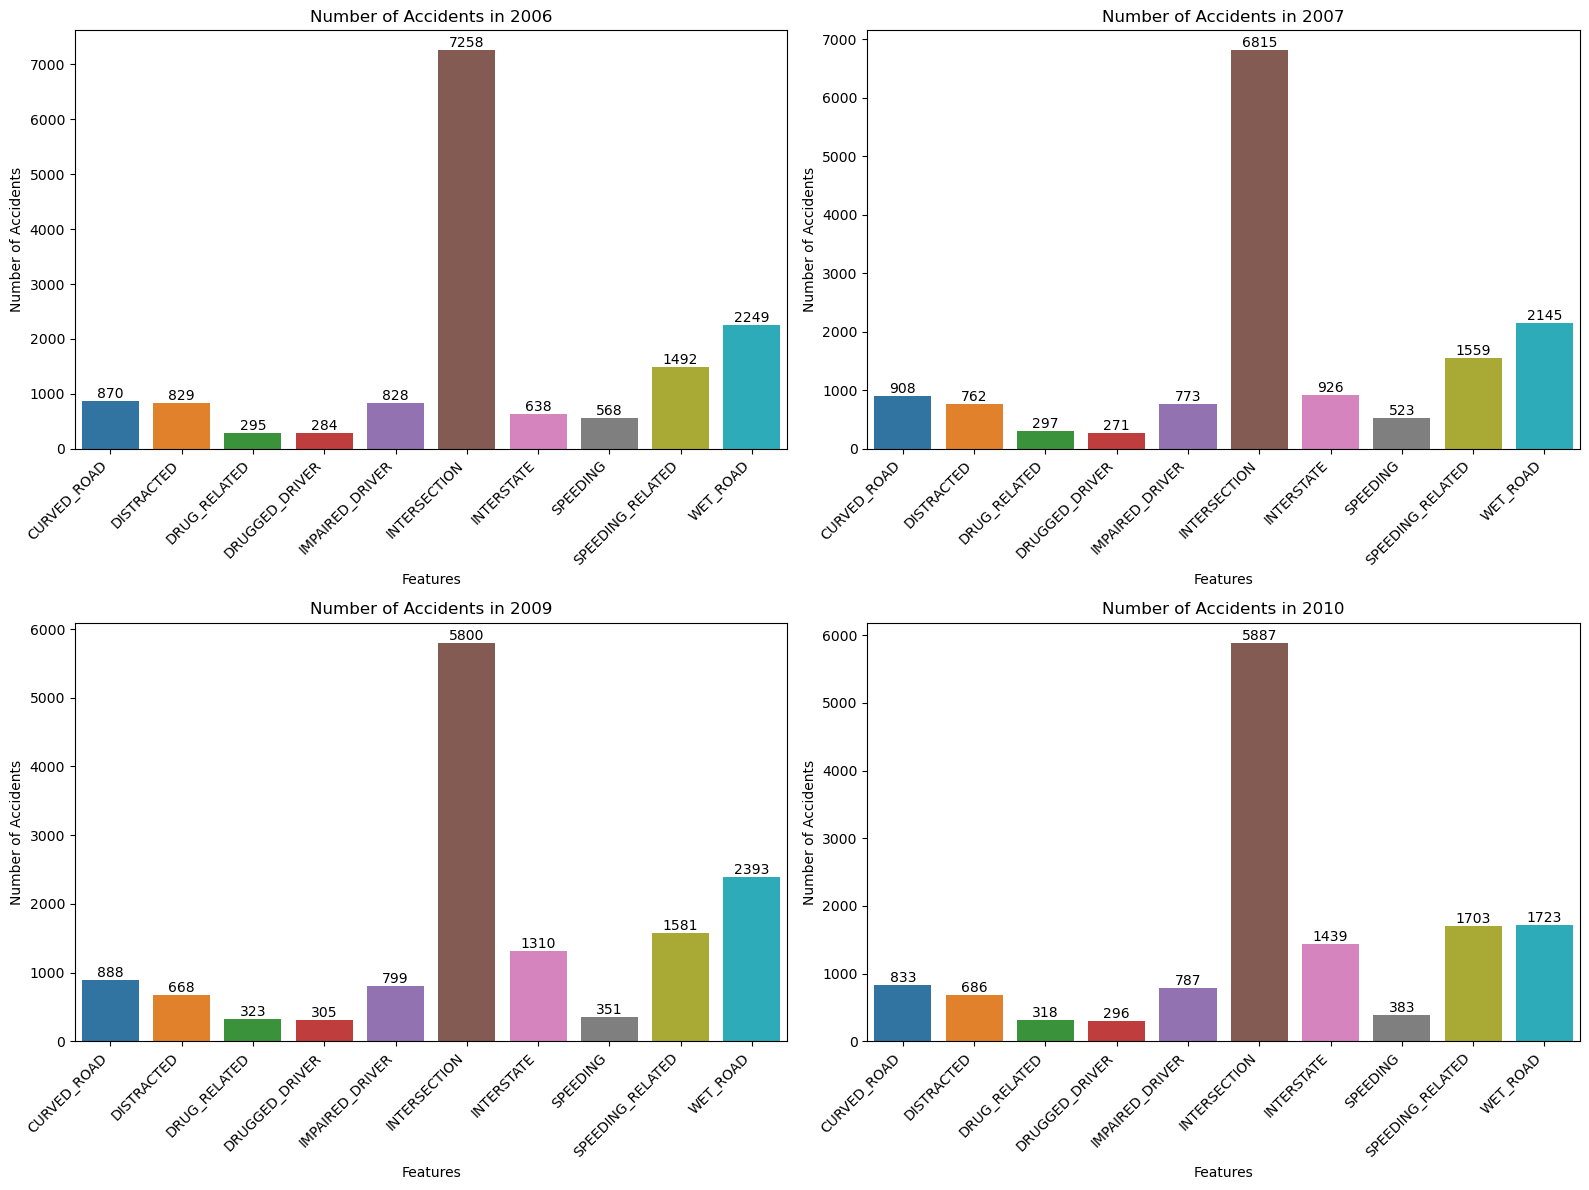

In [257]:
# Plotting the comparison with number of accidents per feature for all four years
plt.figure(figsize=(16, 12))

# Plot for 2006
plt.subplot(2, 2, 1)
sns.barplot(x=accidents_2006.index.drop('CRN'), y=accidents_2006.drop('CRN').values)
plt.title('Number of Accidents in 2006')
plt.xlabel('Features')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')

# Add text labels for number of accidents per feature in 2006
for i, value in enumerate(accidents_2006.drop('CRN').values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Plot for 2007
plt.subplot(2, 2, 2)
sns.barplot(x=accidents_2007.index.drop('CRN'), y=accidents_2007.drop('CRN').values)
plt.title('Number of Accidents in 2007')
plt.xlabel('Features')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')

# Add text labels for number of accidents per feature in 2007
for i, value in enumerate(accidents_2007.drop('CRN').values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Plot for 2009
plt.subplot(2, 2, 3)
sns.barplot(x=accidents_2009.index.drop('CRN'), y=accidents_2009.drop('CRN').values)
plt.title('Number of Accidents in 2009')
plt.xlabel('Features')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')

# Add text labels for number of accidents per feature in 2009
for i, value in enumerate(accidents_2009.drop('CRN').values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Plot for 2010
plt.subplot(2, 2, 4)
sns.barplot(x=accidents_2010.index.drop('CRN'), y=accidents_2010.drop('CRN').values)
plt.title('Number of Accidents in 2010')
plt.xlabel('Features')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')

# Add text labels for number of accidents per feature in 2010
for i, value in enumerate(accidents_2010.drop('CRN').values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


Merging datasets

In [258]:
cleaned_2006_data.to_csv('project data\cleaned_flagdata_2006.csv', index=False)
cleaned_2007_data.to_csv('project data\cleaned_flagdata_2007.csv', index=False)
cleaned_2009_data.to_csv('project data\cleaned_flagdata_2009.csv', index=False)
cleaned_2010_data.to_csv('project data\cleaned_flagdata_2010.csv', index=False)

In [259]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
#using traffic camera dataset with years containing 2006-2010 installation of cameras 
camera = pd.read_csv("project data\Cameras Dataset 2006-2010.csv")

In [260]:
def read_crash_data(year):
    file_path = f"project data/CRASH_Philadelphia_{year}.csv"
    crash_data = pd.read_csv(file_path, low_memory=False)
    return crash_data

for year in range(2006, 2011):
    globals()[f"crash{year}"] = read_crash_data(year)
    print(f"crash{year} with shape: {globals()[f'crash{year}'].shape}")

crash2006 with shape: (11753, 100)
crash2007 with shape: (11625, 100)
crash2008 with shape: (10676, 100)
crash2009 with shape: (10742, 100)
crash2010 with shape: (11070, 100)


In [261]:
def read_crash_data(year):
    file_path = f"project data/FLAG_Philadelphia_{year}.csv"
    crash_data = pd.read_csv(file_path)
    return crash_data

for year in range(2006, 2011):
    globals()[f"flag{year}"] = read_crash_data(year)
    print(f"flag{year} with shape: {globals()[f'flag{year}'].shape}")

flag2006 with shape: (11753, 120)
flag2007 with shape: (11625, 120)
flag2008 with shape: (10676, 120)
flag2009 with shape: (10742, 120)
flag2010 with shape: (11070, 120)


In [262]:
def read_crash_data(year):
    file_path = f"project data/ROADWAY_Philadelphia_{year}.csv"
    crash_data = pd.read_csv(file_path)
    return crash_data

for year in range(2006, 2011):
    globals()[f"roadway{year}"] = read_crash_data(year)
    print(f"roadway{year} with shape: {globals()[f'roadway{year}'].shape}")

roadway2006 with shape: (21540, 13)
roadway2007 with shape: (20227, 13)
roadway2008 with shape: (18267, 13)
roadway2009 with shape: (19312, 13)
roadway2010 with shape: (19678, 13)


In [263]:
camera

,OBJECTID,STATEWIDE_ID,DISTRICT_ID,STATUS_ID,MPMS_PROJ_ID,PLAN_DEPLOY_YEAR,INSTALL_TYPE_ID,STRUCT_TYPE_ID,POLE_HEIGHT,LOC_DISTRICT_NO,...,IS_FROM_REGIONAL,IS_FROM_ROPS,IS_FROM_MPMS,RECORD_UPDATE,ID,GIS_UPDATE_DATE,GIS_GEOMETRY_UPDATE_DATE,SE_ANNO_CAD_DATA,GPID,Has Geometry
0,8467,CAM-06-293,CM 179,1,64479.0,2009,1,8,55.0,6,...,NaN,NaN,NaN,3/25/2024 8:51:05 PM,590,8/5/2019 1:14:05 PM,8/5/2019 1:14:05 PM,NaN,8467,Y
1,8468,CAM-06-294,CM 2301,1,62616.0,2009,1,8,55.0,6,...,NaN,NaN,NaN,3/25/2024 8:51:06 PM,591,8/5/2019 1:14:05 PM,8/5/2019 1:14:05 PM,NaN,8468,Y
2,8469,CAM-06-295,CM 2302,1,62616.0,2009,1,8,55.0,6,...,NaN,NaN,NaN,3/25/2024 8:51:06 PM,592,8/5/2019 1:14:05 PM,8/5/2019 1:14:05 PM,NaN,8469,Y
3,8470,CAM-06-296,CM 2303,1,62616.0,2009,1,8,55.0,6,...,NaN,NaN,NaN,3/25/2024 8:51:06 PM,593,8/5/2019 1:14:05 PM,8/5/2019 1:14:05 PM,NaN,8470,Y
4,8471,CAM-06-297,CM 3071,1,64479.0,2008,1,8,55.0,6,...,NaN,NaN,NaN,3/25/2024 8:51:07 PM,594,8/5/2019 1:14:05 PM,8/5/2019 1:14:05 PM,NaN,8471,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,7977,CAM-08-060,C_D8_83-24,1,NaN,2010,1,7,55.0,8,...,NaN,NaN,NaN,3/25/2024 10:12:51 PM,70,8/5/2019 1:14:05 PM,8/5/2019 1:14:05 PM,NaN,7977,Y
346,7979,CAM-08-062,C_D8_83-31,1,NaN,2010,1,7,55.0,8,...,NaN,NaN,NaN,3/25/2024 10:12:52 PM,72,8/5/2019 1:14:05 PM,8/5/2019 1:14:05 PM,NaN,7979,Y
347,7996,CAM-08-079,C_D8_22-PA 39,1,NaN,2010,1,7,55.0,8,...,NaN,NaN,NaN,3/25/2024 10:13:00 PM,89,8/5/2019 1:14:05 PM,8/5/2019 1:14:05 PM,NaN,7996,Y
348,8001,CAM-08-084,C_D8_30-PA 283,1,NaN,2010,1,7,55.0,8,...,NaN,NaN,NaN,3/25/2024 10:13:03 PM,94,8/5/2019 1:14:05 PM,8/5/2019 1:14:05 PM,NaN,8001,Y


In [264]:
def print_column_names_with_index(df):
    print("Column names and their index locations:")
    for i, column_name in enumerate(df.columns):
        print(f"{i} Column '{column_name}'")

print_column_names_with_index(crash2006)

Column names and their index locations:
0 Column 'CRN'
1 Column 'ARRIVAL_TM'
2 Column 'AUTOMOBILE_COUNT'
3 Column 'BELTED_DEATH_COUNT'
4 Column 'BELTED_SUSP_SERIOUS_INJ_COUNT'
5 Column 'BICYCLE_COUNT'
6 Column 'BICYCLE_DEATH_COUNT'
7 Column 'BICYCLE_SUSP_SERIOUS_INJ_COUNT'
8 Column 'BUS_COUNT'
9 Column 'CHLDPAS_DEATH_COUNT'
10 Column 'CHLDPAS_SUSP_SERIOUS_INJ_COUNT'
11 Column 'COLLISION_TYPE'
12 Column 'COMM_VEH_COUNT'
13 Column 'CONS_ZONE_SPD_LIM'
14 Column 'COUNTY'
15 Column 'CRASH_MONTH'
16 Column 'CRASH_YEAR'
17 Column 'DAY_OF_WEEK'
18 Column 'DEC_LAT'
19 Column 'DEC_LONG'
20 Column 'DISPATCH_TM'
21 Column 'DISTRICT'
22 Column 'DRIVER_COUNT_16YR'
23 Column 'DRIVER_COUNT_17YR'
24 Column 'DRIVER_COUNT_18YR'
25 Column 'DRIVER_COUNT_19YR'
26 Column 'DRIVER_COUNT_20YR'
27 Column 'DRIVER_COUNT_50_64YR'
28 Column 'DRIVER_COUNT_65_74YR'
29 Column 'DRIVER_COUNT_75PLUS'
30 Column 'EST_HRS_CLOSED'
31 Column 'FATAL_COUNT'
32 Column 'HEAVY_TRUCK_COUNT'
33 Column 'HORSE_BUGGY_COUNT'
34 Column 'H

In [265]:
def keep_specific_columns_inplace(df, keep_indexes):
    drop_indexes = [i for i in range(len(df.columns)) if i not in keep_indexes]
    df.drop(df.columns[drop_indexes], axis=1, inplace=True)

keep_indexes = [0, 2, 5, 8, 11, 14, 15, 17, 18, 19, 34, 35, 37, 38, 39, 40, 42, 43, 47, 53, 60, 61, 64, 65, 71, 72, 76, 85, 86]
keep_specific_columns_inplace(crash2006, keep_indexes)
keep_specific_columns_inplace(crash2007, keep_indexes)
keep_specific_columns_inplace(crash2008, keep_indexes)
keep_specific_columns_inplace(crash2009, keep_indexes)
keep_specific_columns_inplace(crash2010, keep_indexes)

In [266]:
crash2006.shape

(11753, 29)

In [267]:
crash2006.isnull().sum()

CRN                         0
AUTOMOBILE_COUNT            0
BICYCLE_COUNT               0
BUS_COUNT                   0
COLLISION_TYPE              0
COUNTY                      0
CRASH_MONTH                 0
DAY_OF_WEEK                 0
DEC_LAT                  2513
DEC_LONG                 2513
HOUR_OF_DAY                 0
ILLUMINATION                0
INTERSECT_TYPE              0
INTERSECTION_RELATED    11753
LANE_CLOSED                 1
LATITUDE                 2515
LOCATION_TYPE               0
LONGITUDE                2515
MOTORCYCLE_COUNT            0
PED_COUNT                   0
RELATION_TO_ROAD            0
ROAD_CONDITION              0
SCH_ZONE_IND             1067
SECONDARY_CRASH         11753
TCD_FUNC_CD                 0
TCD_TYPE                    0
TOTAL_UNITS                 0
VEHICLE_COUNT               0
WEATHER1                    0
dtype: int64

In [268]:
crash2006.drop(['LONGITUDE', 'LATITUDE','INTERSECTION_RELATED', 'SECONDARY_CRASH'], axis=1)
crash2007.drop(['LONGITUDE', 'LATITUDE','INTERSECTION_RELATED', 'SECONDARY_CRASH'], axis=1)
crash2008.drop(['LONGITUDE', 'LATITUDE','INTERSECTION_RELATED', 'SECONDARY_CRASH'], axis=1)
crash2009.drop(['LONGITUDE', 'LATITUDE','INTERSECTION_RELATED', 'SECONDARY_CRASH'], axis=1)
crash2010.drop(['LONGITUDE', 'LATITUDE','INTERSECTION_RELATED', 'SECONDARY_CRASH'], axis=1)

,CRN,AUTOMOBILE_COUNT,BICYCLE_COUNT,BUS_COUNT,COLLISION_TYPE,COUNTY,CRASH_MONTH,DAY_OF_WEEK,DEC_LAT,DEC_LONG,...,MOTORCYCLE_COUNT,PED_COUNT,RELATION_TO_ROAD,ROAD_CONDITION,SCH_ZONE_IND,TCD_FUNC_CD,TCD_TYPE,TOTAL_UNITS,VEHICLE_COUNT,WEATHER1
0,2010105912,2,0,0,4,67,9,5,39.9627,-75.2471,...,0,0,1,1,N,3,2,2,2,3
1,2010099508,1,1,0,4,67,9,7,39.9865,-75.1579,...,0,0,1,1,N,3,2,2,1,3
2,2010100908,0,0,0,4,67,9,4,39.8993,-75.1755,...,0,0,1,1,N,3,2,2,2,3
3,2010094271,1,0,0,8,67,9,6,40.0554,-75.1433,...,0,1,1,1,N,0,0,2,1,3
4,2010110782,2,0,0,2,67,9,4,40.0353,-75.1214,...,0,0,1,1,N,3,2,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11065,2011023494,3,0,0,4,67,1,5,40.0260,-75.1467,...,0,0,1,1,N,3,2,3,3,3
11066,2011011021,1,0,0,7,67,12,2,39.8917,-75.2228,...,0,0,2,1,N,0,0,1,1,3
11067,2011000982,1,0,0,2,67,10,7,40.0543,-75.1413,...,0,0,1,1,N,0,0,2,2,3
11068,2011000990,2,0,0,1,67,11,1,40.0568,-75.1607,...,0,0,1,1,N,3,2,2,2,3


In [269]:
data_set_names = ['flag2006', 'flag2007', 'flag2008', 'flag2009', 'flag2010']

columns_to_keep = ['CRN', 'CURVED_ROAD', 'DISTRACTED', 'DRUG_RELATED', 'DRUGGED_DRIVER', 'IMPAIRED_DRIVER',
                   'INTERSECTION', 'INTERSTATE', 'SPEEDING', 'SPEEDING_RELATED', 'WET_ROAD']

for data_set_name in data_set_names:
    data_set = globals()[data_set_name]
    
    # Drop columns 
    data_set = data_set.drop(columns=data_set.columns.difference(columns_to_keep))
    
    # Remove rows containing a 0 in every column
    mask = data_set[columns_to_keep].eq(0).all(axis=1)
    data_set = data_set[~mask]
    
    globals()[data_set_name] = data_set

In [270]:
flag2006

,CRN,CURVED_ROAD,DISTRACTED,DRUG_RELATED,DRUGGED_DRIVER,IMPAIRED_DRIVER,INTERSECTION,INTERSTATE,SPEEDING,SPEEDING_RELATED,WET_ROAD
0,2006033283,0,0,0,0,0,0,0,0,0,0
1,2006123825,0,0,0,0,0,1,0,0,0,0
2,2006113461,0,0,0,0,0,1,0,0,0,0
3,2006080851,0,0,0,0,0,0,0,0,0,0
4,2006103260,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
11748,2006062720,0,0,0,0,0,0,0,0,0,0
11749,2007007551,0,0,0,0,1,0,0,0,0,1
11750,2006054944,0,0,0,0,0,1,0,0,0,0
11751,2007007577,0,0,0,0,0,1,0,0,0,0


In [271]:
data_set_names = ['roadway2006', 'roadway2007', 'roadway2008', 'roadway2009', 'roadway2010']
columns_to_keep = ['CRN', 'LANE_COUNT', 'SPEED_LIMIT', 'STREET_NAME']

for data_set_name in data_set_names:
    data_set = globals()[data_set_name]
    
    # Drop columns
    data_set = data_set.drop(columns=data_set.columns.difference(columns_to_keep))
    
    globals()[data_set_name] = data_set

In [272]:
roadway2006

,CRN,LANE_COUNT,SPEED_LIMIT,STREET_NAME
0,2006062399,2,35.0,LINDEN AV
1,2006055305,1,35.0,NaN
2,2006034194,2,25.0,CLARISSA ST
3,2006079948,2,25.0,CASTOR AV
4,2006094184,2,25.0,LEHIGH AV
...,...,...,...,...
21535,2007022296,2,25.0,ASHLAND AV
21536,2007010239,2,NaN,22ND ST
21537,2006105138,2,35.0,PHILMONT AV
21538,2007022731,3,35.0,KELLY DR


In [273]:
def merge_crash_and_flag(crash_df, flag_df):
    merged_df = pd.merge(crash_df, flag_df, on='CRN', how='left')
    return merged_df

years = [2006, 2007, 2008, 2009, 2010]
merged_data = {}

for year in years:
    crash_df = globals()[f'crash{year}']
    flag_df = globals()[f'flag{year}']
    
    merged_df = merge_crash_and_flag(crash_df, flag_df)
    
    merged_data[f'merged{year}'] = merged_df

In [274]:
merged_all = []

for year in years:
    merged_df_name = f'merged{year}'
    merged_all.append(merged_data[merged_df_name])

merged_final = pd.concat(merged_all, ignore_index=True)

In [275]:
merged_final

,CRN,AUTOMOBILE_COUNT,BICYCLE_COUNT,BUS_COUNT,COLLISION_TYPE,COUNTY,CRASH_MONTH,DAY_OF_WEEK,DEC_LAT,DEC_LONG,...,CURVED_ROAD,DISTRACTED,DRUG_RELATED,DRUGGED_DRIVER,IMPAIRED_DRIVER,INTERSECTION,INTERSTATE,SPEEDING,SPEEDING_RELATED,WET_ROAD
0,2006103675,1,0,0,1,67,8,4,40.0202,-75.1525,...,0,0,0,0,0,0,0,0,0,0
1,2006096594,2,0,0,2,67,6,5,40.0254,-75.0429,...,0,0,0,0,0,1,0,0,0,0
2,2006096609,1,0,0,4,67,8,4,40.0586,-75.2341,...,0,0,0,0,0,1,0,0,0,0
3,2006102080,0,0,0,8,67,9,2,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2006125746,1,1,0,4,67,11,4,39.9880,-75.1260,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55861,2011023494,3,0,0,4,67,1,5,40.0260,-75.1467,...,0,0,0,0,0,1,0,0,0,0
55862,2011011021,1,0,0,7,67,12,2,39.8917,-75.2228,...,1,0,0,0,0,0,1,0,1,0
55863,2011000982,1,0,0,2,67,10,7,40.0543,-75.1413,...,0,0,0,0,0,0,0,0,0,0
55864,2011000990,2,0,0,1,67,11,1,40.0568,-75.1607,...,0,0,0,0,0,1,0,0,0,0


In [276]:
merged_final.dropna(subset=['DEC_LONG', 'DEC_LAT'], inplace=True)

In [277]:
merged_final

,CRN,AUTOMOBILE_COUNT,BICYCLE_COUNT,BUS_COUNT,COLLISION_TYPE,COUNTY,CRASH_MONTH,DAY_OF_WEEK,DEC_LAT,DEC_LONG,...,CURVED_ROAD,DISTRACTED,DRUG_RELATED,DRUGGED_DRIVER,IMPAIRED_DRIVER,INTERSECTION,INTERSTATE,SPEEDING,SPEEDING_RELATED,WET_ROAD
0,2006103675,1,0,0,1,67,8,4,40.0202,-75.1525,...,0,0,0,0,0,0,0,0,0,0
1,2006096594,2,0,0,2,67,6,5,40.0254,-75.0429,...,0,0,0,0,0,1,0,0,0,0
2,2006096609,1,0,0,4,67,8,4,40.0586,-75.2341,...,0,0,0,0,0,1,0,0,0,0
4,2006125746,1,1,0,4,67,11,4,39.9880,-75.1260,...,0,0,0,0,0,1,0,0,0,0
5,2006065985,2,0,0,1,67,6,6,39.9456,-75.1651,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55861,2011023494,3,0,0,4,67,1,5,40.0260,-75.1467,...,0,0,0,0,0,1,0,0,0,0
55862,2011011021,1,0,0,7,67,12,2,39.8917,-75.2228,...,1,0,0,0,0,0,1,0,1,0
55863,2011000982,1,0,0,2,67,10,7,40.0543,-75.1413,...,0,0,0,0,0,0,0,0,0,0
55864,2011000990,2,0,0,1,67,11,1,40.0568,-75.1607,...,0,0,0,0,0,1,0,0,0,0


In [339]:
# Set the threshold for similarity
# About 111 meters
threshold = 0.001

merged_final['camera'] = 0

for index, row in camera.iterrows():
    # Check if the longitude and latitude combination exists in merged_final DataFrame
    mask = ((merged_final['DEC_LONG'] - row['LONGITUDE']).abs() <= threshold) & ((merged_final['DEC_LAT'] - row['LATITUDE']).abs() <= threshold)
    if mask.any():
        merged_final.loc[mask, 'camera'] = 1

In [335]:
import random

# Set the threshold for similarity (about 111 meters)
threshold = 0.001

# List to store selected locations
selected_locations = []

# Randomly select 10 locations where there is an accident without a nearby camera (label 0)
accidents_without_camera = merged_final[merged_final['camera'] == 0]
selected_indices_0 = random.sample(accidents_without_camera.index.tolist(), k=10)
selected_locations.extend([(row['DEC_LAT'], row['DEC_LONG']) for _, row in merged_final.loc[selected_indices_0].iterrows()])

# Randomly select 10 locations where there is an accident with a nearby camera within the threshold (label 1)
accidents_with_camera = merged_final[merged_final['camera'] == 1]
selected_indices_1 = []
for _, camera_row in camera.iterrows():
    nearby_accidents = accidents_with_camera[
        (abs(accidents_with_camera['DEC_LONG'] - camera_row['LONGITUDE']) <= threshold) &
        (abs(accidents_with_camera['DEC_LAT'] - camera_row['LATITUDE']) <= threshold)
    ]
    if len(nearby_accidents) > 0:
        selected_indices_1.append(random.choice(nearby_accidents.index.tolist()))

selected_locations.extend([(row['DEC_LAT'], row['DEC_LONG']) for _, row in merged_final.loc[selected_indices_1].iterrows()])

# Print selected locations
print("Selected locations:", selected_locations)




Selected locations: [(40.0158, -75.1174), (40.0604, -75.044), (40.0251, -75.1182), (40.0244, -75.1469), (39.9808, -75.1708), (40.0882, -75.0727), (39.9745, -75.1587), (39.9692, -75.2284), (39.9606, -75.1753), (40.0061, -75.1085), (40.0012, -75.2264), (40.0124, -75.0691), (40.0205, -75.0537), (40.0216, -75.0519), (40.0281, -75.039), (40.0299, -75.035), (40.0354, -75.025), (40.0403, -75.0154), (40.0504, -74.9999), (40.0234, -75.0348), (40.0258, -75.032), (40.0089, -75.072), (40.0168, -75.0668), (39.9724, -75.1223), (39.8946, -75.1947), (40.0103, -75.2071), (40.0065, -75.1984), (40.0043, -75.1944), (39.9946, -75.1983), (39.9867, -75.2076), (39.9831, -75.2081), (39.9783, -75.2022), (39.9765, -75.197), (39.9746, -75.1943), (39.9689, -75.1918), (39.9645, -75.185), (39.9607, -75.1822), (39.9557, -75.1806), (39.9531, -75.182), (39.9488, -75.1856), (39.9456, -75.1901), (39.9427, -75.1934), (39.9358, -75.1997), (39.9291, -75.1971), (39.9233, -75.1914), (39.9216, -75.1912), (39.9215, -75.1905), (

In [283]:
# Set the threshold for similarity (about 111 meters)
#threshold = 0.00001

# Initialize a set to store accident indices that have already been assigned to a camera
#assigned_accidents = set()

#for index, row in camera.iterrows():
    # Check if the longitude and latitude combination exists in merged_final DataFrame
 #   mask = ((merged_final['DEC_LONG'] - row['LONGITUDE']).abs() <= threshold) & ((merged_final['DEC_LAT'] - row['LATITUDE']).abs() <= threshold)
  #  if mask.any():
        # Get the indices of accidents within the threshold
   #     indices_within_threshold = merged_final[mask].index
        
        # Filter out accidents that have already been assigned to a camera
    #    new_indices = [idx for idx in indices_within_threshold if idx not in assigned_accidents]
        
        # Update the 'camera' column for new accidents
     #   merged_final.loc[new_indices, 'camera'] = 1
        
        # Add newly assigned accidents to the set of assigned accidents
      #  assigned_accidents.update(new_indices)


In [314]:
merged_final

,AUTOMOBILE_COUNT,BICYCLE_COUNT,BUS_COUNT,COLLISION_TYPE,COUNTY,CRASH_MONTH,DAY_OF_WEEK,DEC_LAT,DEC_LONG,HOUR_OF_DAY,...,DISTRACTED,DRUG_RELATED,DRUGGED_DRIVER,IMPAIRED_DRIVER,INTERSECTION,INTERSTATE,SPEEDING,SPEEDING_RELATED,WET_ROAD,camera
0,1,0,0,1,67,8,4,40.0202,-75.1525,5.0,...,0,0,0,0,0,0,0,0,0,1
1,2,0,0,2,67,6,5,40.0254,-75.0429,99.0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,4,67,8,4,40.0586,-75.2341,20.0,...,0,0,0,0,1,0,0,0,0,1
4,1,1,0,4,67,11,4,39.9880,-75.1260,17.0,...,0,0,0,0,1,0,0,0,0,1
5,2,0,0,1,67,6,6,39.9456,-75.1651,2.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55861,3,0,0,4,67,1,5,40.0260,-75.1467,20.0,...,0,0,0,0,1,0,0,0,0,1
55862,1,0,0,7,67,12,2,39.8917,-75.2228,1.0,...,0,0,0,0,0,1,0,1,0,1
55863,1,0,0,2,67,10,7,40.0543,-75.1413,2.0,...,0,0,0,0,0,0,0,0,0,1
55864,2,0,0,1,67,11,1,40.0568,-75.1607,8.0,...,0,0,0,0,1,0,0,0,0,1


In [340]:
camera_counts = merged_final['camera'].value_counts()
print(camera_counts)

0    50833
1     1884
Name: camera, dtype: int64


In [330]:
merged_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52717 entries, 0 to 55865
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AUTOMOBILE_COUNT  52717 non-null  int64  
 1   BICYCLE_COUNT     52717 non-null  int64  
 2   BUS_COUNT         52717 non-null  int64  
 3   COLLISION_TYPE    52717 non-null  int64  
 4   COUNTY            52717 non-null  int64  
 5   CRASH_MONTH       52717 non-null  int64  
 6   DAY_OF_WEEK       52717 non-null  int64  
 7   DEC_LAT           52717 non-null  float64
 8   DEC_LONG          52717 non-null  float64
 9   HOUR_OF_DAY       52717 non-null  float64
 10  ILLUMINATION      52717 non-null  int64  
 11  INTERSECT_TYPE    52717 non-null  int64  
 12  LOCATION_TYPE     52717 non-null  int64  
 13  MOTORCYCLE_COUNT  52717 non-null  int64  
 14  PED_COUNT         52717 non-null  int64  
 15  RELATION_TO_ROAD  52717 non-null  int64  
 16  ROAD_CONDITION    52717 non-null  int64 

In [331]:
merged_final.dropna(subset=['HOUR_OF_DAY'], inplace=True)
merged_final = merged_final[merged_final['ROAD_CONDITION'] != 0]

In [332]:
merged_final.drop(columns=['CRN', 'LATITUDE', 'LONGITUDE', 'SCH_ZONE_IND', 'INTERSECTION_RELATED', 'SECONDARY_CRASH',
                          'TCD_FUNC_CD','TCD_TYPE','LANE_CLOSED'], inplace=True)

KeyError: "['CRN', 'LATITUDE', 'LONGITUDE', 'SCH_ZONE_IND', 'INTERSECTION_RELATED', 'SECONDARY_CRASH', 'TCD_FUNC_CD', 'TCD_TYPE', 'LANE_CLOSED'] not found in axis"

## Logistic Regression Model

In [343]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Separate features and target variable
X = merged_final.drop(columns=['camera'])
y = merged_final['camera']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model with class_weight='balanced'
logreg = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.98      0.77      0.86     10127
           1       0.10      0.64      0.18       417

    accuracy                           0.76     10544
   macro avg       0.54      0.70      0.52     10544
weighted avg       0.95      0.76      0.83     10544



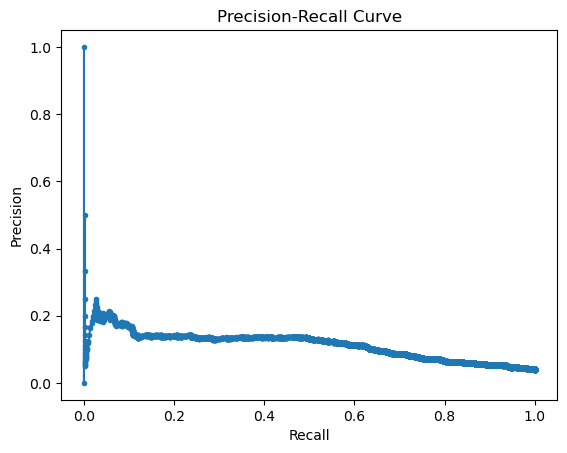

In [344]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get the predicted probabilities for class 1
y_probs = logreg.predict_proba(X_test)[:, 1]

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Plot precision-recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


# # Random Forest Model

In [341]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Separate features and target variable
X = merged_final.drop(columns=['camera'])
y = merged_final['camera']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.97      1.00      0.98     10127
           1       0.89      0.20      0.33       417

    accuracy                           0.97     10544
   macro avg       0.93      0.60      0.66     10544
weighted avg       0.97      0.97      0.96     10544

